Data Science Fundamentals: R |
[Table of Contents](../index.ipynb)
- - - 
<!--NAVIGATION-->
Module 14. [tidyverse](./00.ipynb) | [R Markdown](./01.ipynb) | [R + Shiny App](./02.ipynb) | [Basic Visualization](./03.ipynb) | [Tibbles](./04.ipynb)  | [ggplot2](./05.ipynb) | [Statistical Transformations](./06.ipynb) | [Exercises](./07.ipynb)

# [ggplot2](https://ggplot2.tidyverse.org/)

ggplot2 is a data visualization package for the statistical programming language R. Created by Hadley Wickham in 2005, ggplot2 is an implementation of Leland Wilkinson's Grammar of Graphics—a general scheme for data visualization which breaks up graphs into semantic components such as scales and layers.

![images](images/slides6.png)

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



![images](images/slides7.png)

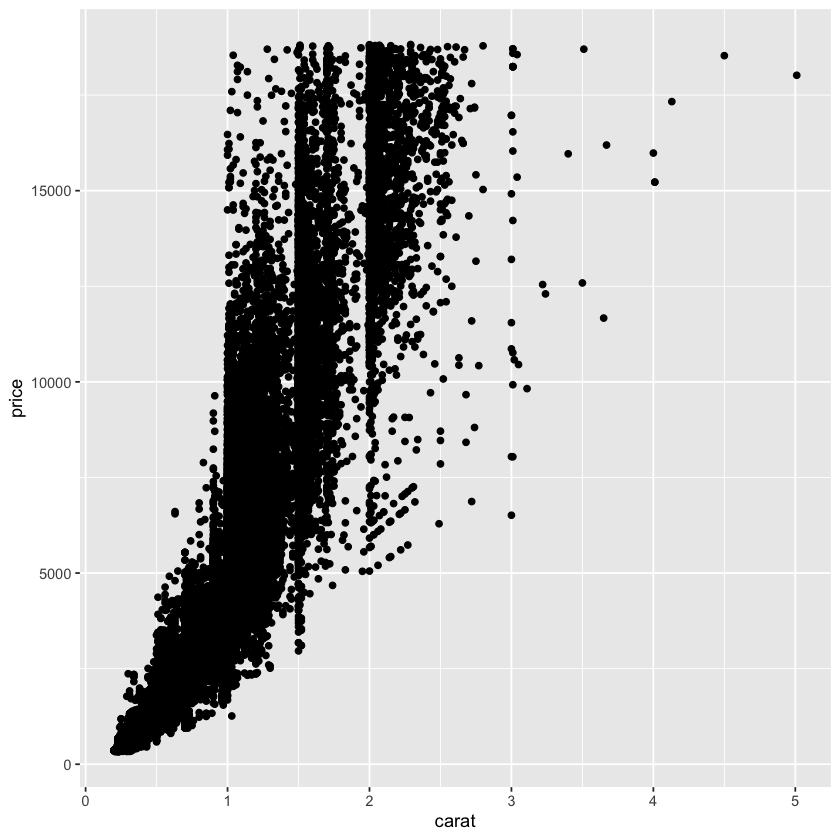

In [3]:
ggplot(diamonds, aes(x=carat,y=price)) + geom_point()

### Plots as Objects

Whenever ggplot() is called an object is created. 

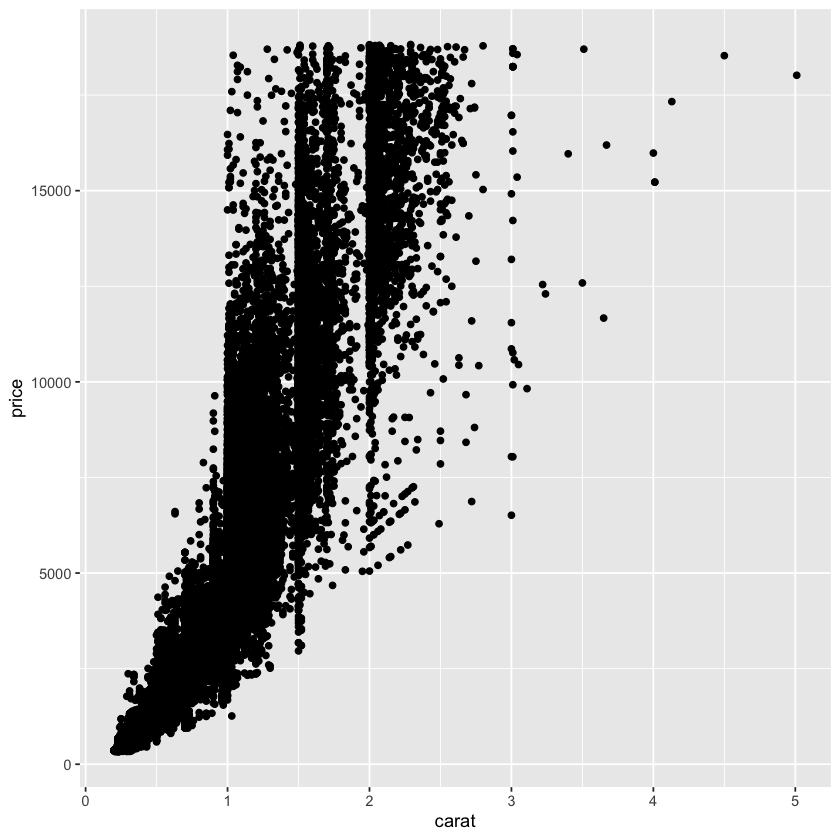

In [4]:
p <- ggplot(diamonds, aes(x=carat,y=price)) + geom_point()
p

### Saving Plots

![images](images/slides8.png)

## Aesthetic Mappings

![images](images/slides9.png)

### Adding Color

Color points based on clarity.

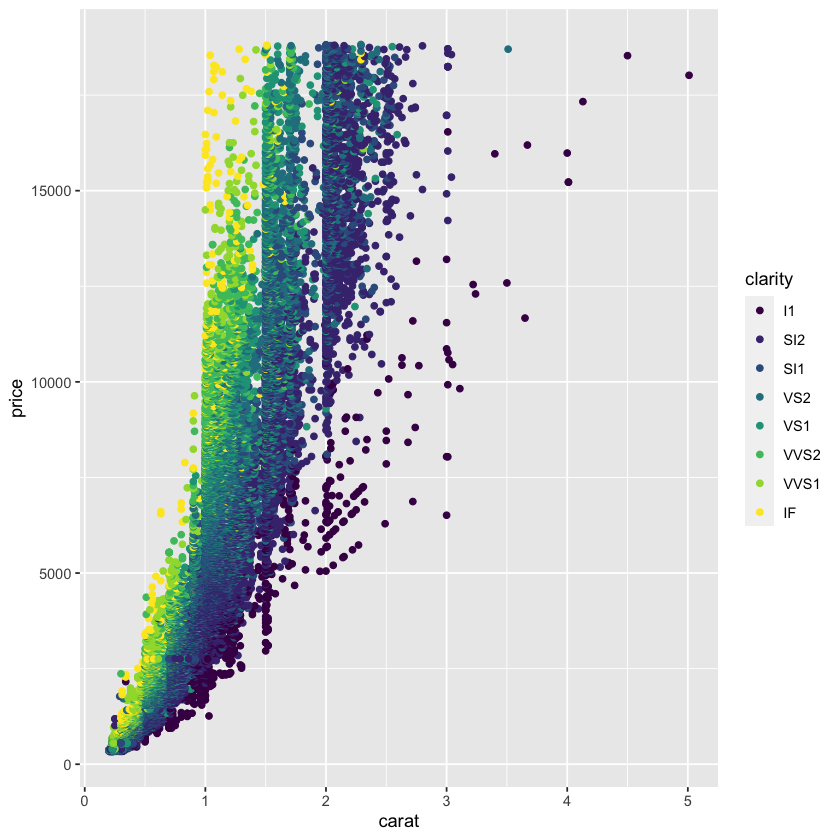

In [5]:
ggplot(diamonds, aes(x=carat,y=price, color=clarity)) + geom_point()

Question: How does the quality of color effect price? 

### Adding Shape

Warning message:
“Using shapes for an ordinal variable is not advised”


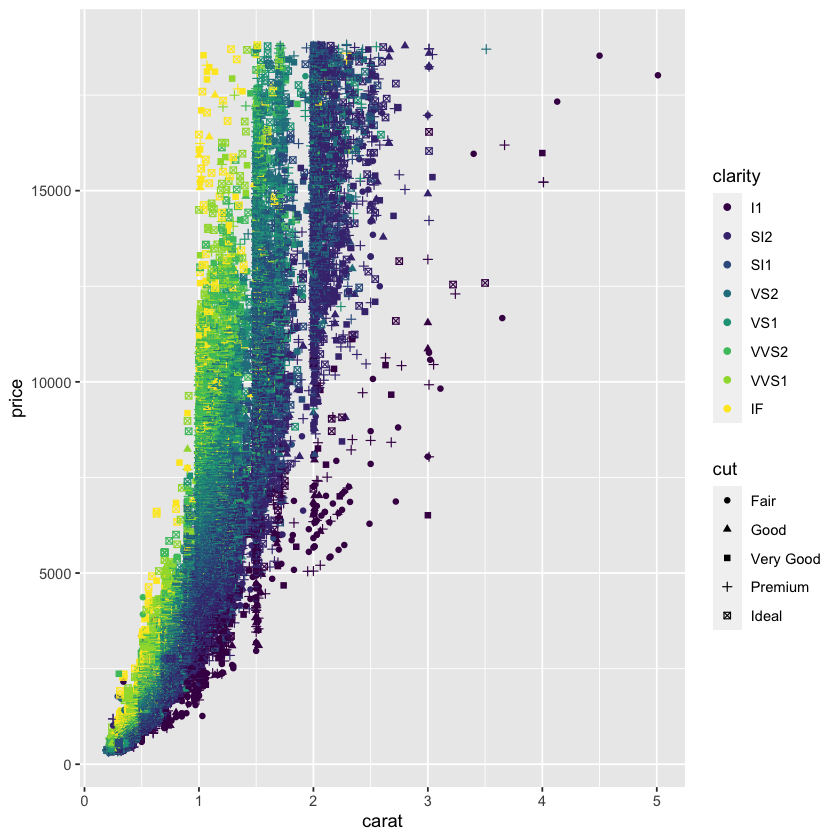

In [5]:
ggplot(diamonds, aes(x=carat,y=price, color=clarity, shape=cut)) + geom_point()

### Facets

The facet approach partitions a plot into a matrix of panels. Each panel shows a different subset of the data. This R tutorial describes how to split a graph using ```ggplot2``` package. There are two main functions for faceting : ```facet_grid()```

Adding ```categorical variables``` to split your plots into facets. 

Warning message:
“Using shapes for an ordinal variable is not advised”


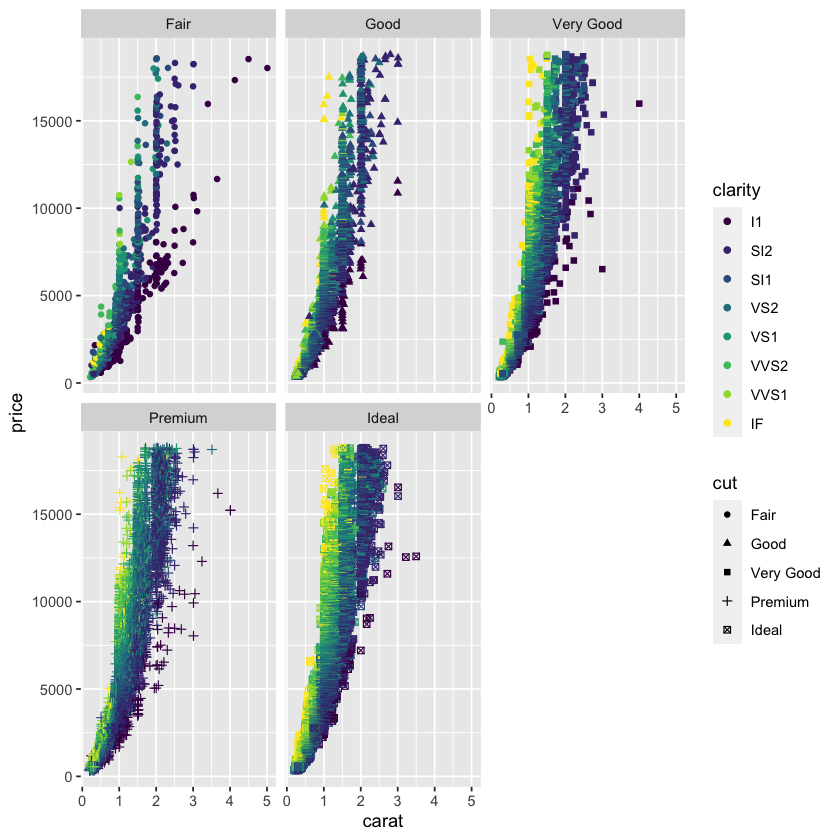

In [7]:
ggplot(diamonds, aes(x=carat,y=price, color=clarity, shape=cut)) + geom_point() + facet_wrap(~ cut)

### Facets for combinations of variables 

Warning message:
“Using shapes for an ordinal variable is not advised”


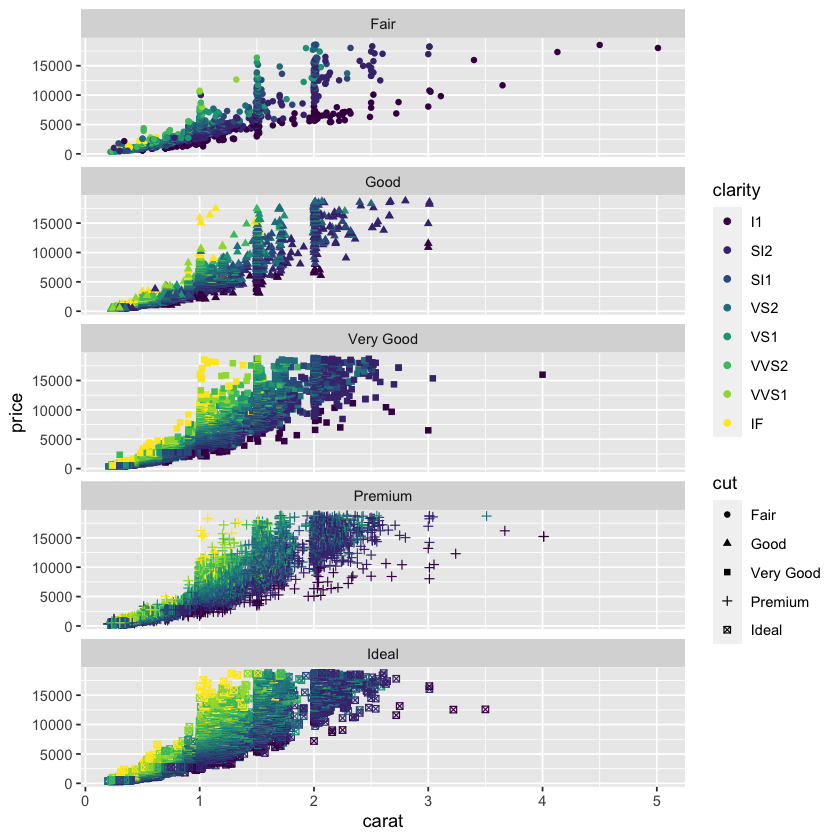

In [8]:
ggplot(diamonds, aes(x=carat,y=price, color=clarity, shape=cut)) + geom_point() + facet_wrap(~ cut, nrow=5)

## Geometric Objects

![images](images/slides10.png)

### What is Data Smoothing?

Data smoothing uses an algorithm to remove noise from a data set, allowing important patterns to stand out. It can be used to predict trends, such as those found in securities prices. Different data smoothing models include the random method, random walk, and the moving average.

[geom_smooth()](https://ggplot2.tidyverse.org/reference/geom_smooth.html)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



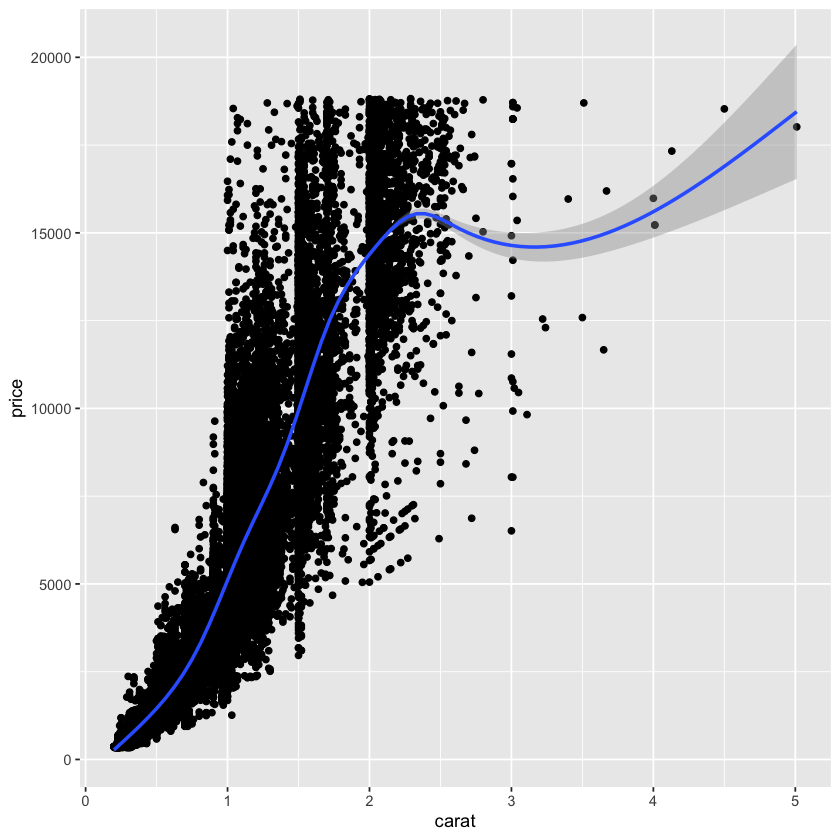

In [9]:
ggplot(diamonds, aes(x=carat,y=price)) + geom_point() + geom_smooth()

The shaded area represents uncertainty in this smoothing curve.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



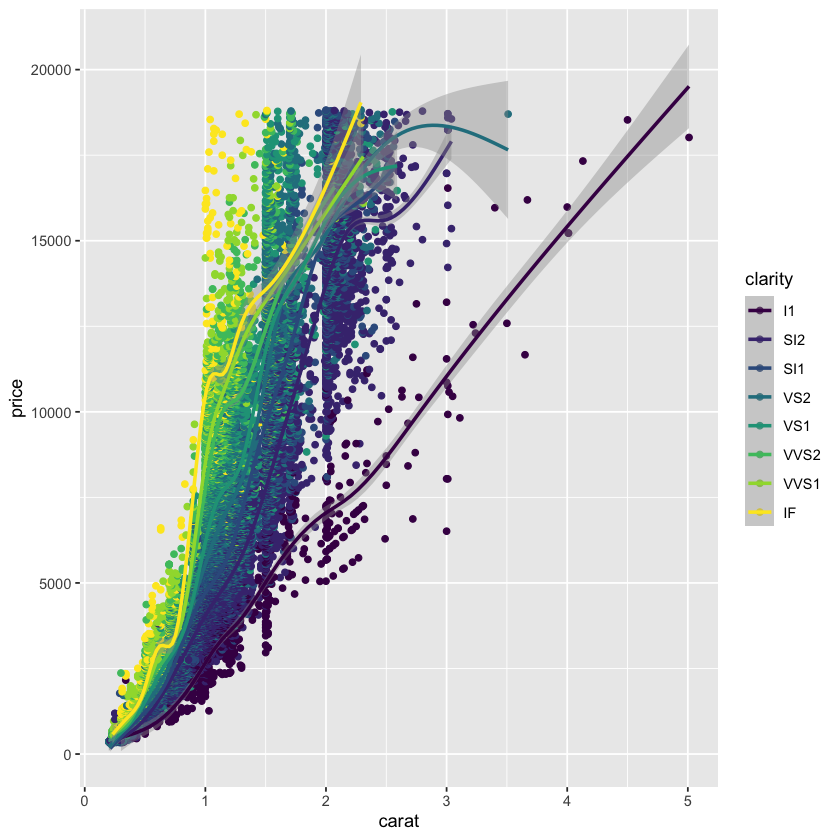

In [10]:
ggplot(diamonds, aes(x=carat,y=price, color=clarity)) + geom_point() + geom_smooth()

Create one smoothing curve per color. 

### Changing the Smoothing Method

`geom_smooth()` using formula 'y ~ x'



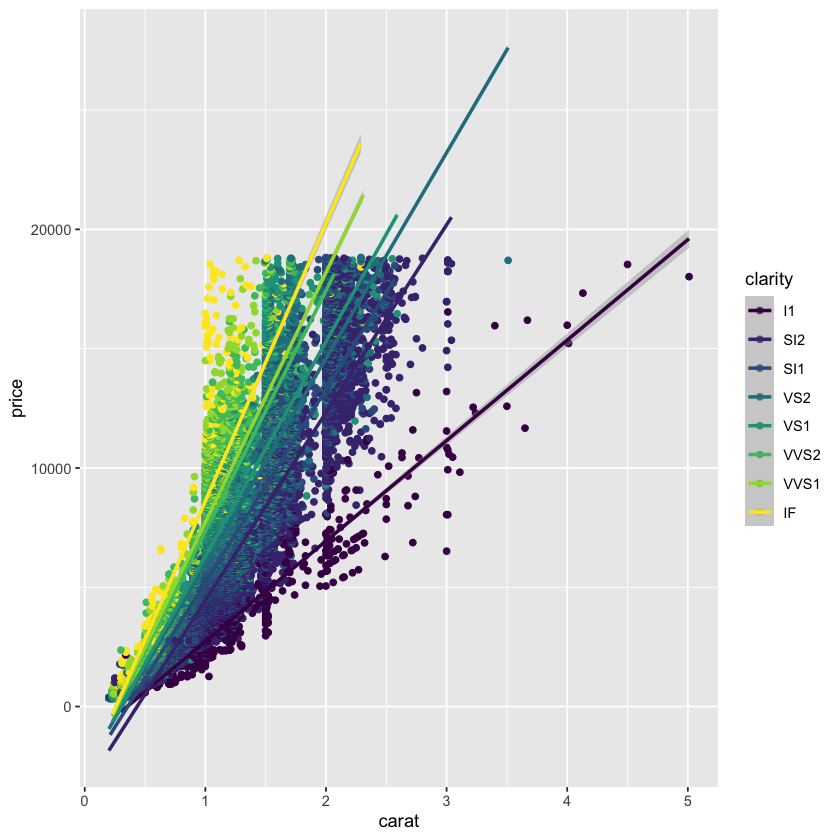

In [11]:
ggplot(diamonds, aes(x=carat,y=price, color=clarity)) + geom_point() + geom_smooth(method="lm")

In [13]:
help(geom_smooth, ggplot2)

### Aesthetics specific for a single geometric object

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



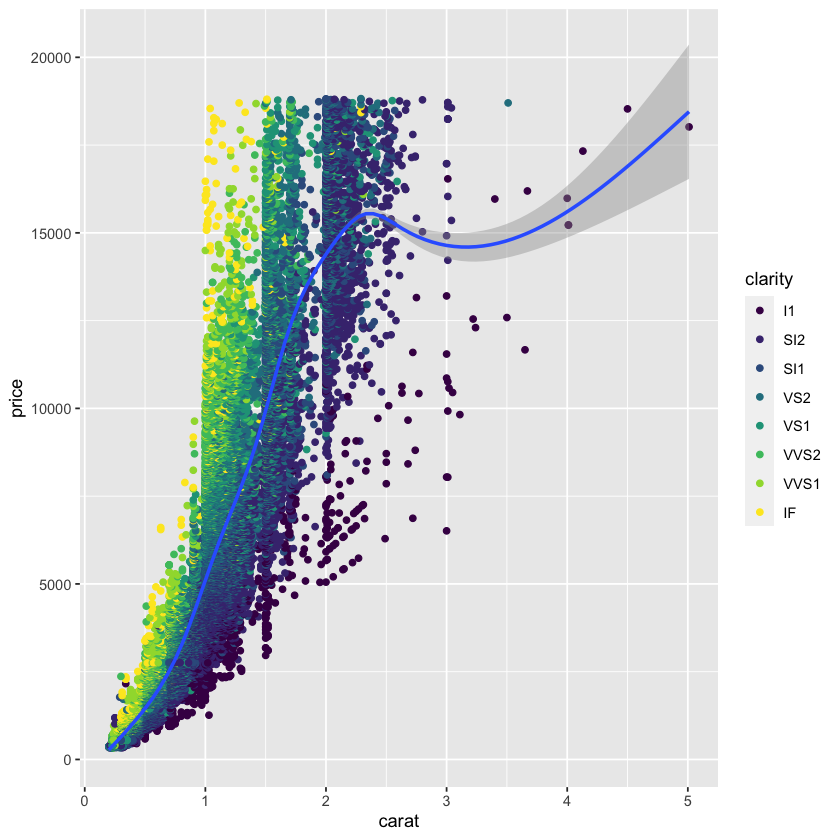

In [14]:
ggplot(diamonds, aes(x=carat,y=price)) + geom_point(aes(color=clarity)) + geom_smooth()

### Aesthetics Mappings versus Fixed Aesthetics 

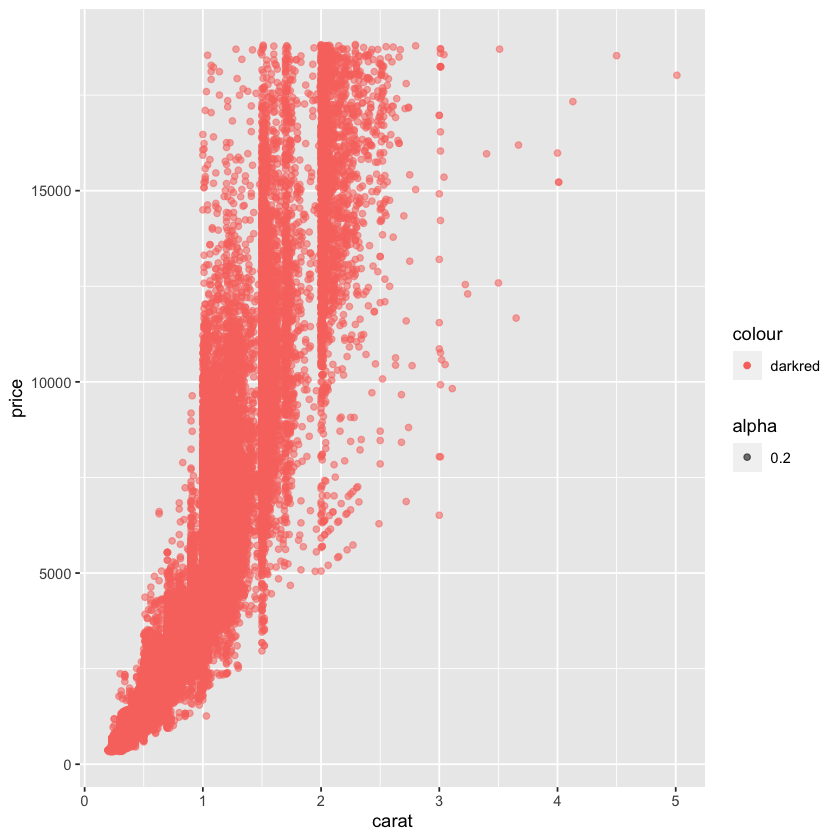

In [15]:
ggplot(diamonds, aes(x=carat,y=price)) + geom_point(aes(color="darkred", alpha=0.2))

Set same color and transparency for all objects.

## Histograms

Histogram is a graphical display of data using bars of different heights. Histogram. It is similar to a Bar Chart, but a histogram groups numbers into ranges.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



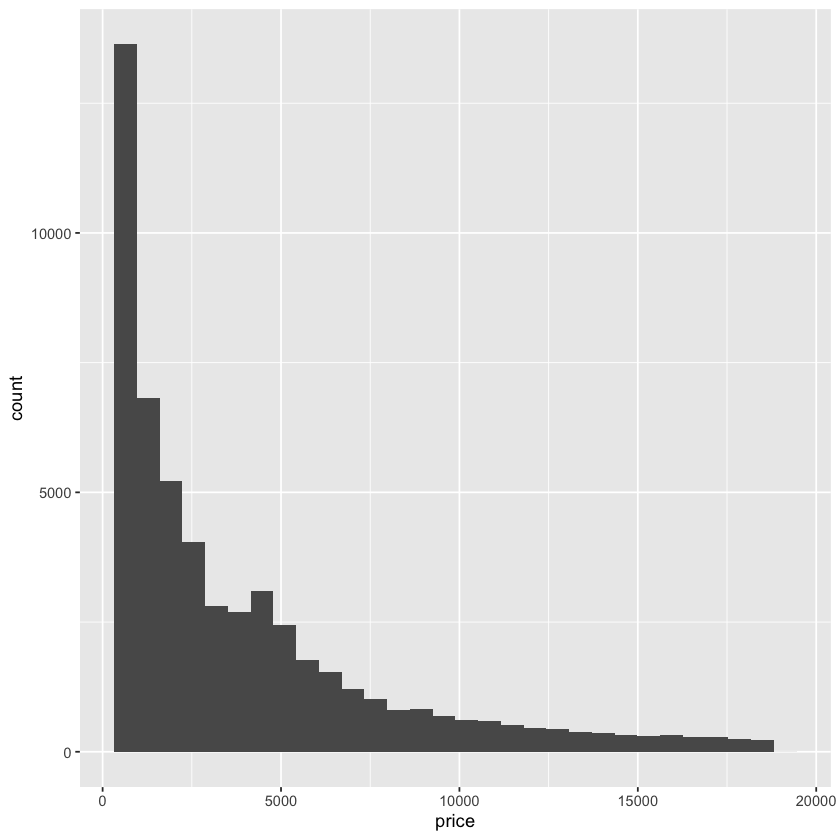

In [17]:
ggplot(diamonds, aes(x=price)) + geom_histogram()

### Specify the number of ```bins``` or ```binswidth```

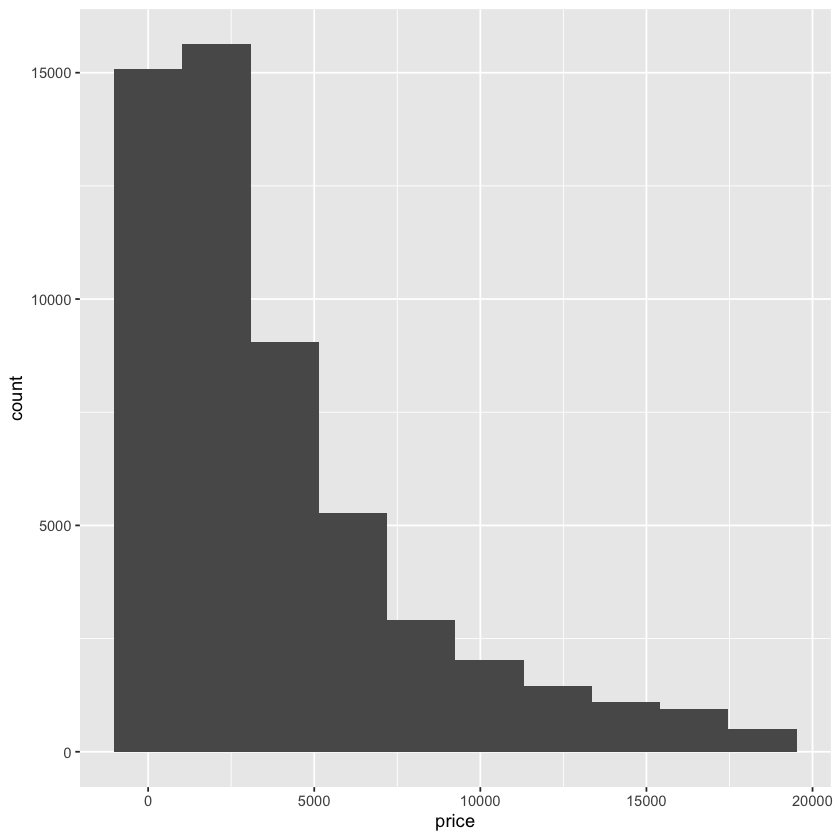

In [18]:
ggplot(diamonds, aes(x=price)) + geom_histogram(bins=10)

## Bar Charts

```geom_bar()``` counts the number of instances of each discrete class. 

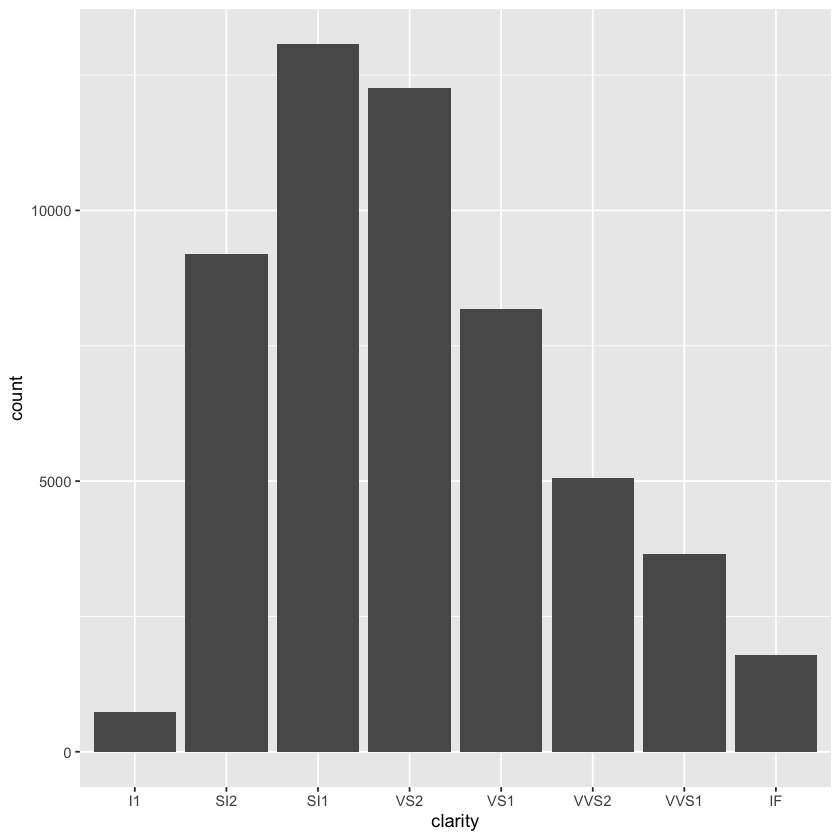

In [21]:
ggplot(diamonds, aes(x=clarity)) + geom_bar()
# aes(x=price)

## Boxplots

In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending from the boxes indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

#### What is a quartile?

A quartile is a type of quantile which divides the number of data points into four more or less equal parts, or quarters. The first quartile is defined as the middle number between the smallest number and the median of the data set.

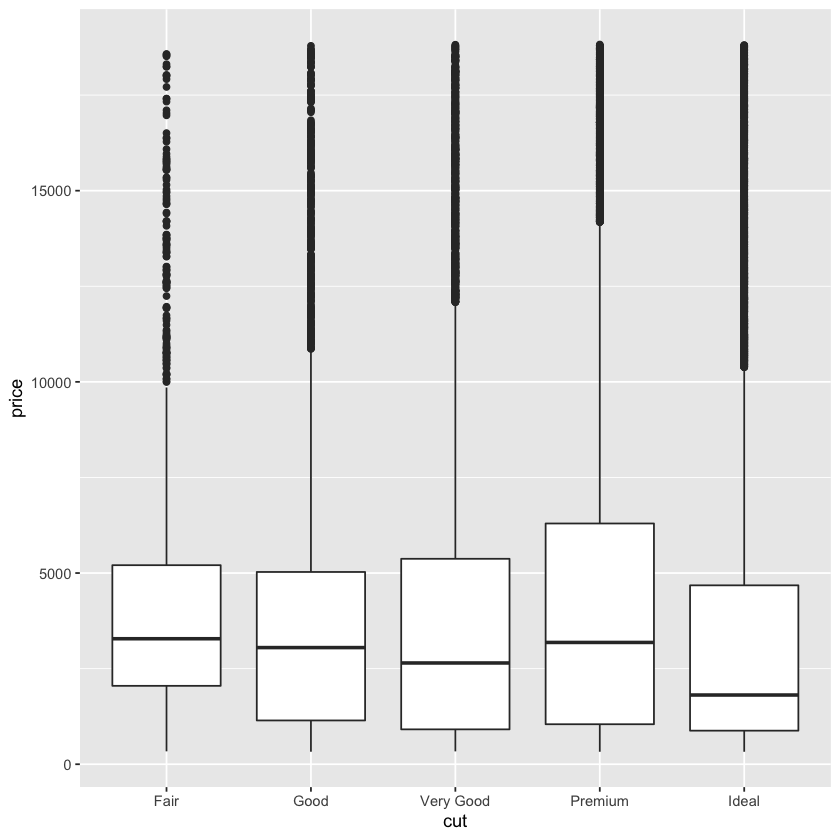

In [26]:
ggplot(diamonds, aes(cut, price)) + geom_boxplot()

## Position Adjustments

![image](images/slides11.png)

In [28]:
p0 <- ggplot(diamonds, aes(x=cut,y=depth))
p1 <- p0 + geom_point()
p2 <- p0 + geom_point(position="jitter")

- Overplotting: many points overlap each other. 
- Variables are categorical but sometimes rounding causes overplotting. 

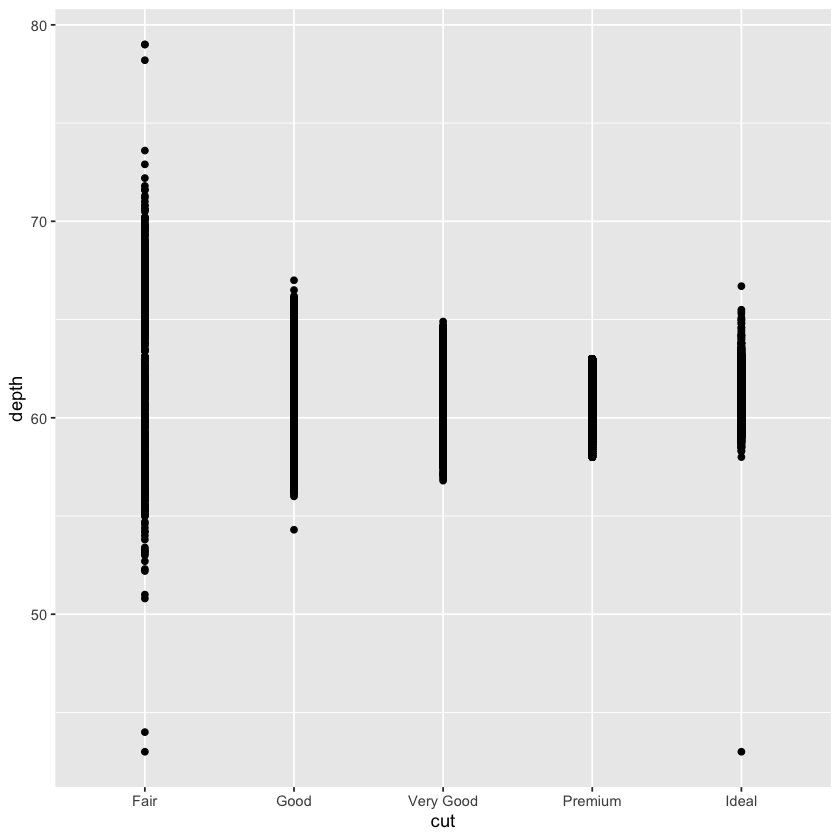

In [29]:
p1

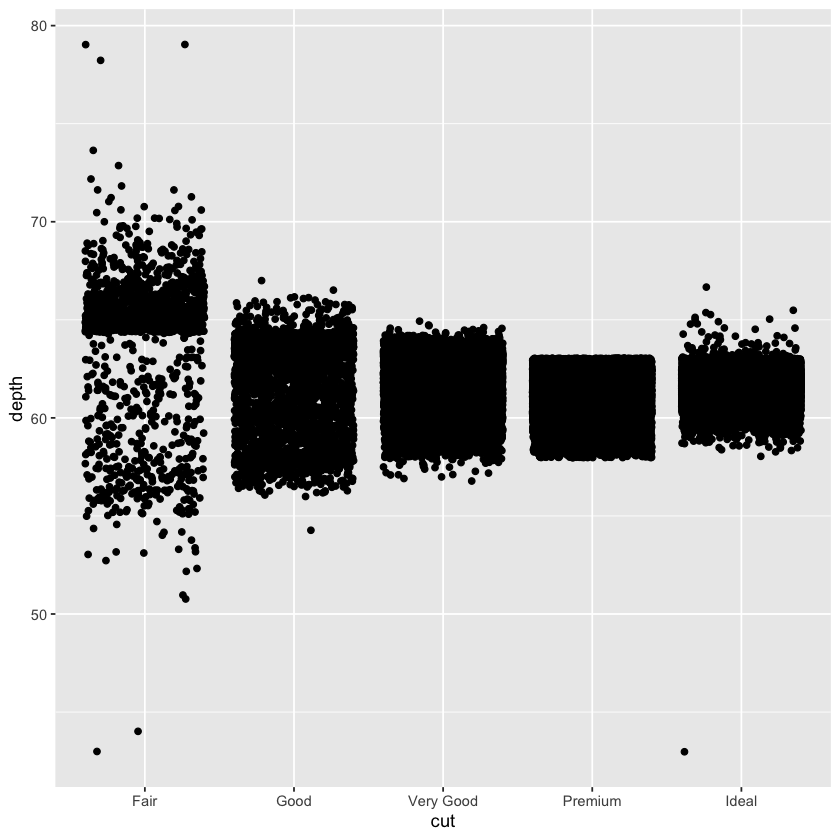

In [30]:
p2

## Scales

![images](images/slides12.png)

### Scales for axes

#### What are scales?

Scales in ggplot2 control the mapping from data to aesthetics. They take your data and turn it into something that you can see, like size, colour, position or shape. They also provide the tools that let you interpret the plot: the axes and legends.

Square Root Transformation on the Y-Axis

In [31]:
p1 <- ggplot(diamonds, aes(x=carat,y=price)) + geom_point()
p2 <- p1 + scale_y_sqrt()

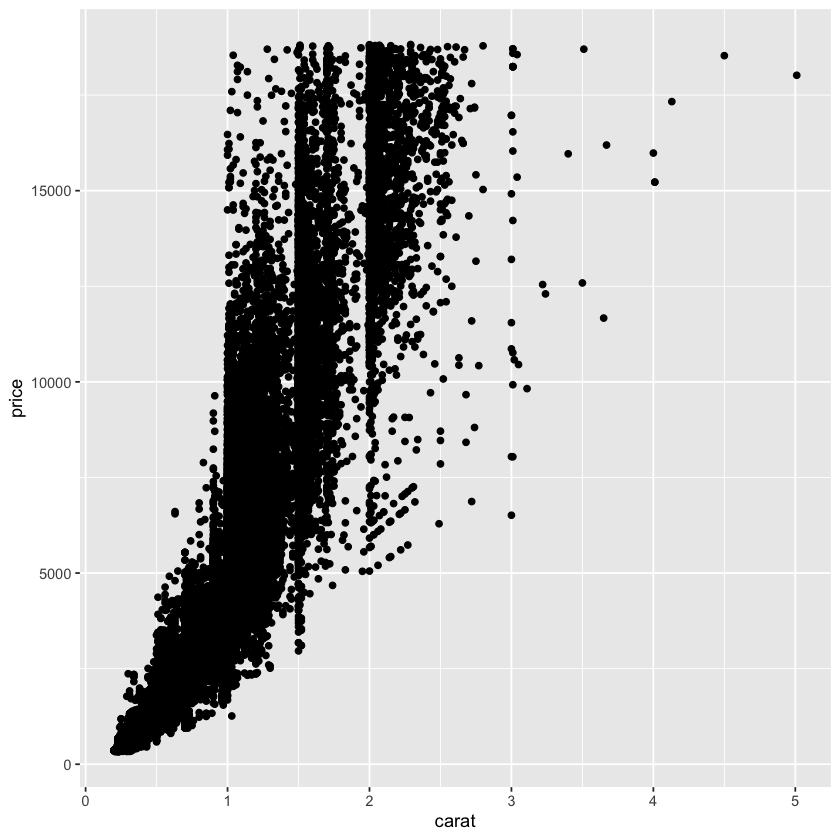

In [33]:
p1

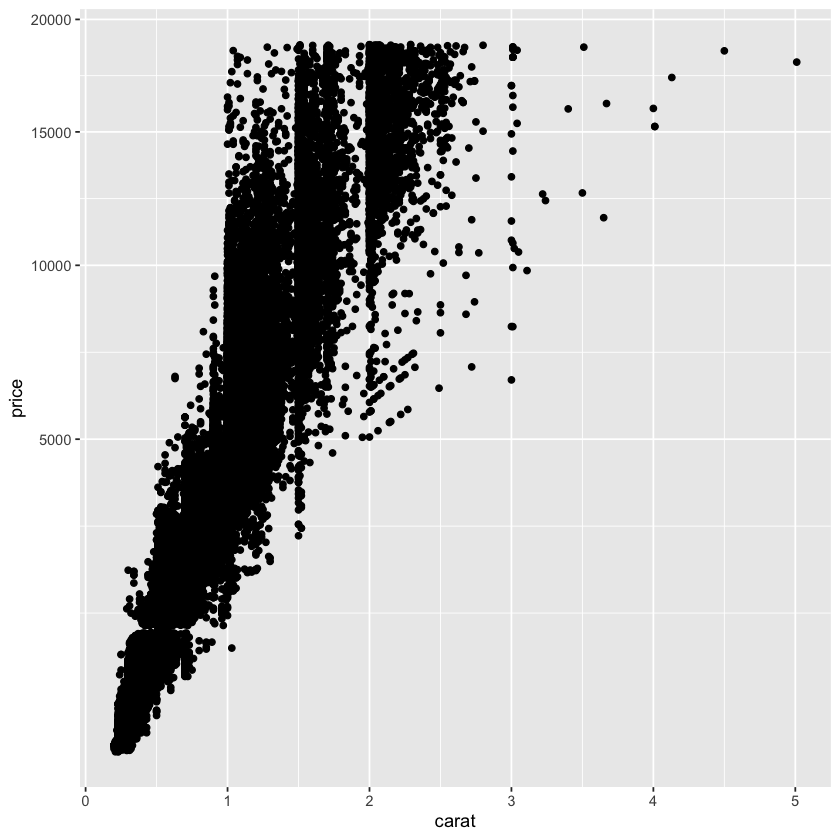

In [32]:
p2

### Scales for shapes

In [36]:
p1 <- ggplot(diamonds, aes(x=carat,y=price, shape=cut)) + geom_point()
p2 <- p1 + scale_shape_manual(values=c(1:5))

Warning message:
“Using shapes for an ordinal variable is not advised”


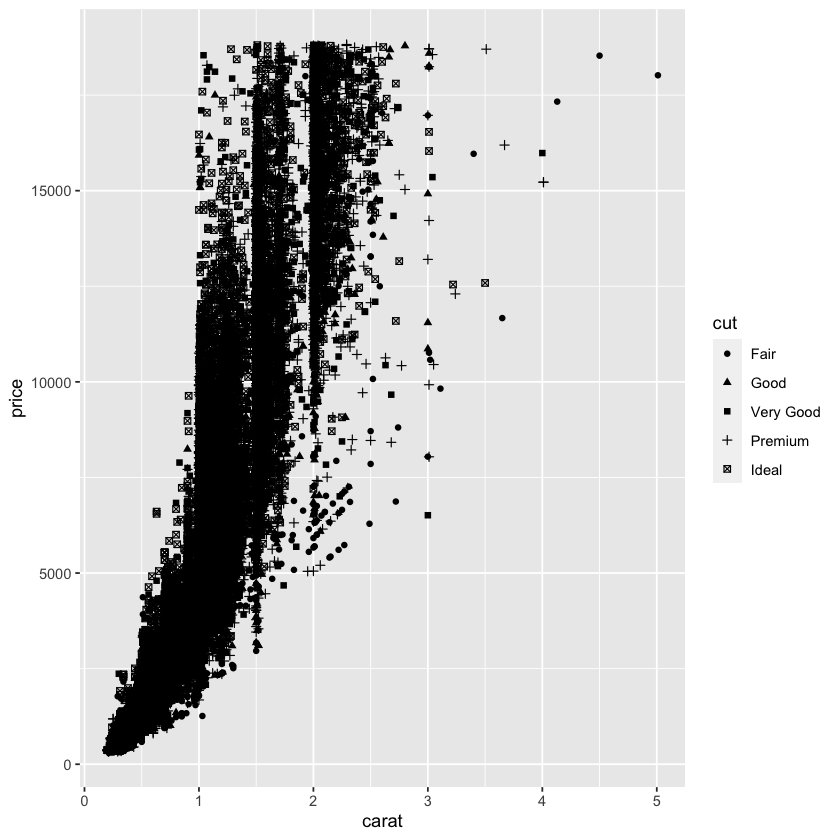

In [37]:
p1

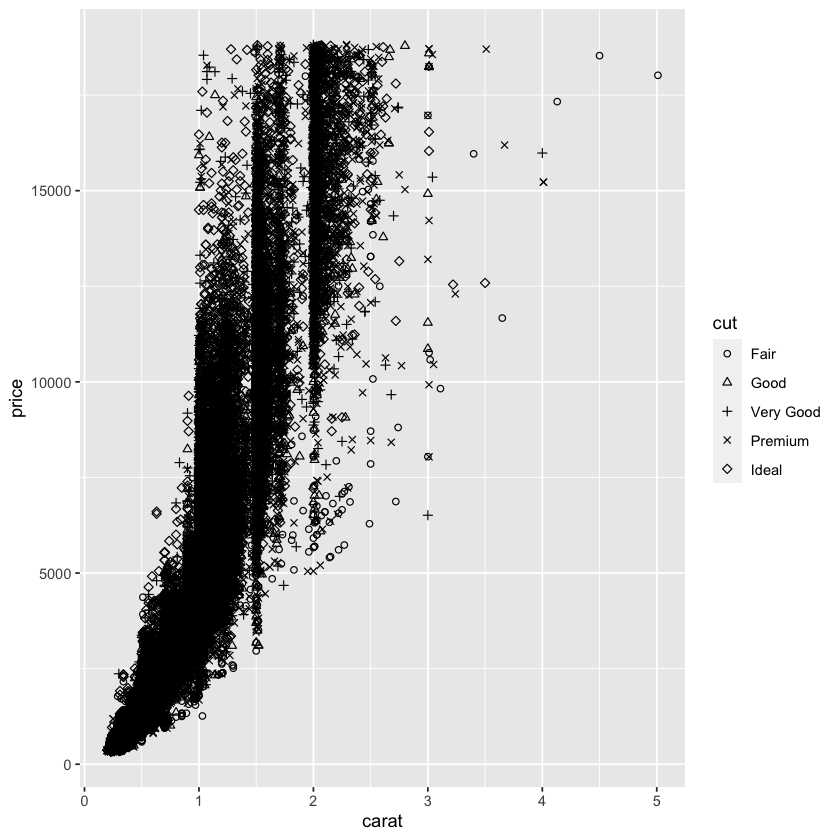

In [38]:
p2

### Scales for discrete colors

To choose specific colors for discrete variables use ```scale_color_manual()```

In [43]:
#shape=cut
p1 <- ggplot(diamonds, aes(x=carat,y=price, color=cut)) + geom_point()
color.values <- c("red","orange","yellow","green","blue")
p2 <- p1 + scale_color_manual(values=color.values)

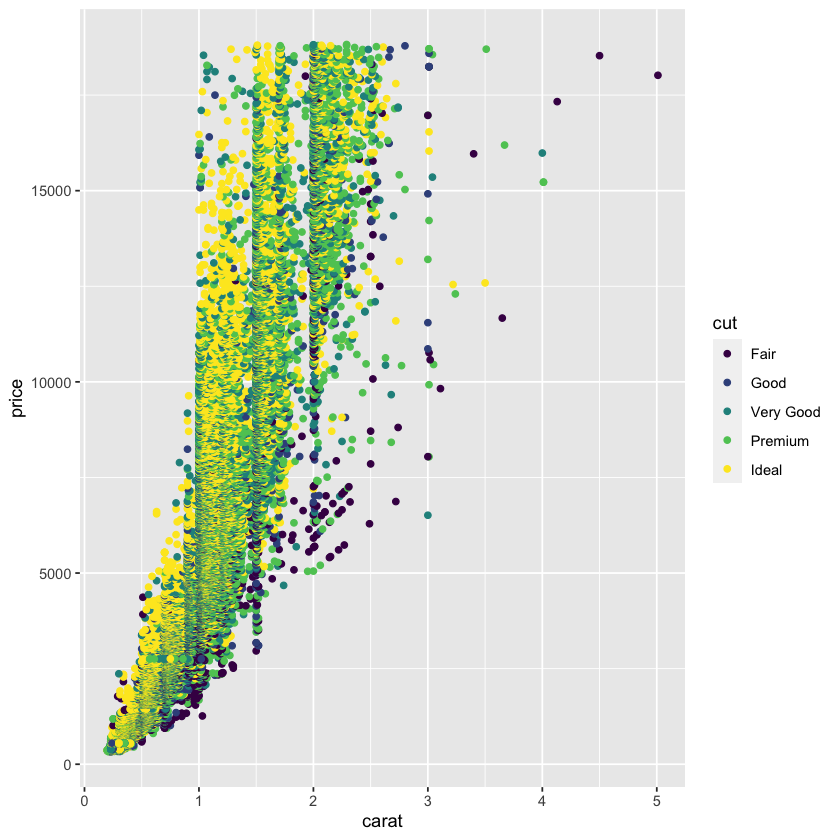

In [44]:
p1

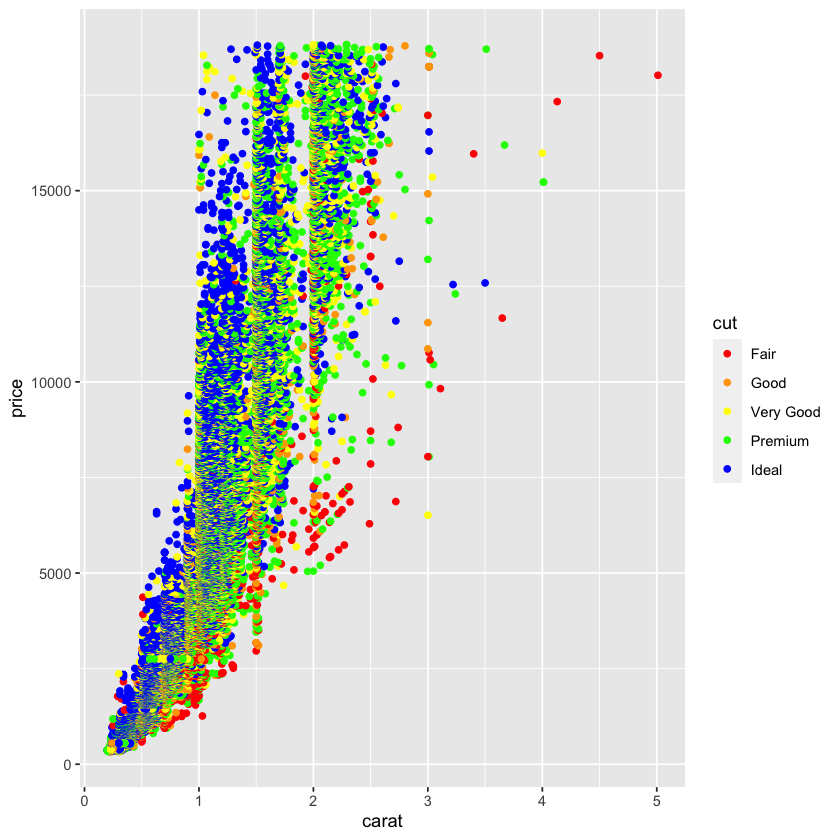

In [45]:
p2

Using ```scale_color_brewer()```

In [50]:
p1 <- ggplot(diamonds, aes(x=carat,y=price, color=cut)) + geom_point()
color.values <- c("red","orange","yellow","green","blue")
p2 <- p1 + scale_color_manual(values=color.values) + scale_color_brewer(type='qual')

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



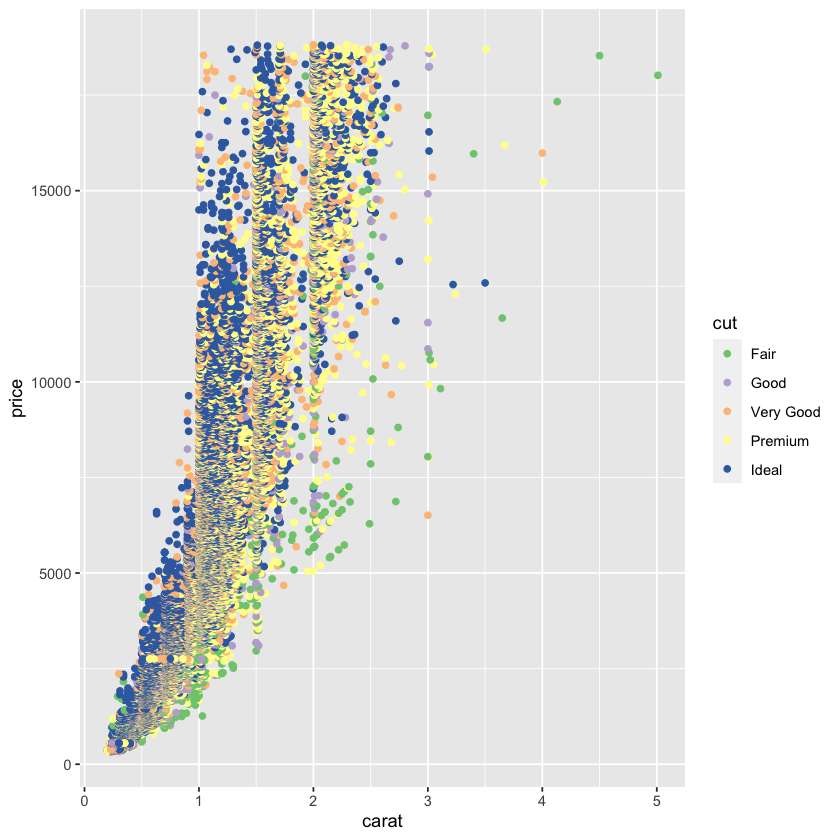

In [51]:
p2

## Manual Transformations

Define your own transformations such as position scaling.  

In [60]:
p1 <- ggplot(diamonds, aes(x=carat,y=price)) + geom_point() + scale_y_sqrt()
p2 <- ggplot(diamonds, aes(x=carat, y=sqrt(price))) + geom_point()

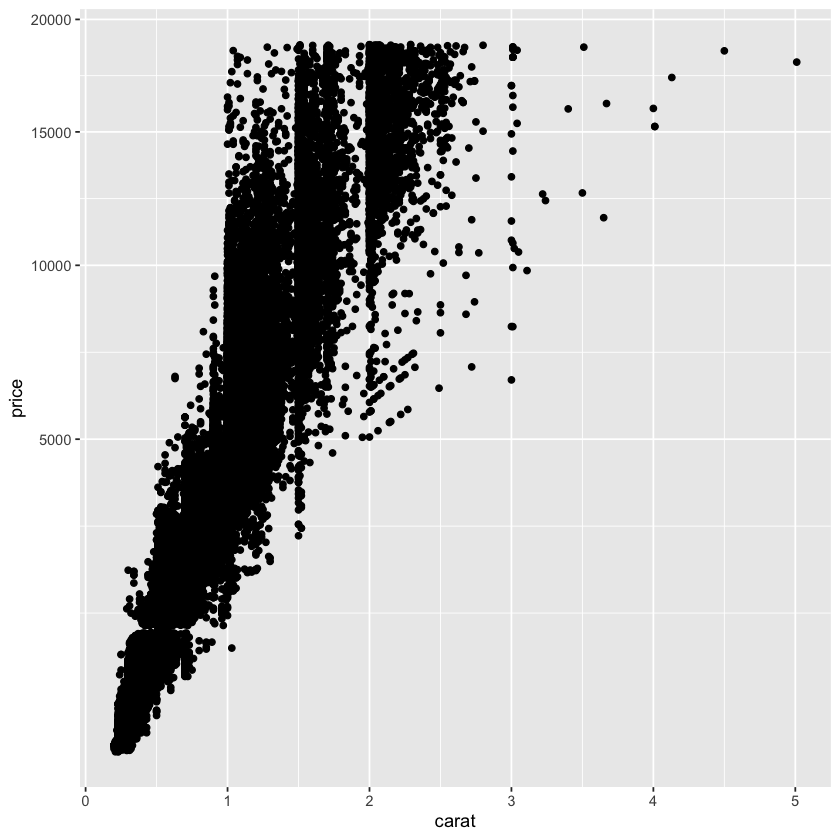

In [63]:
p1

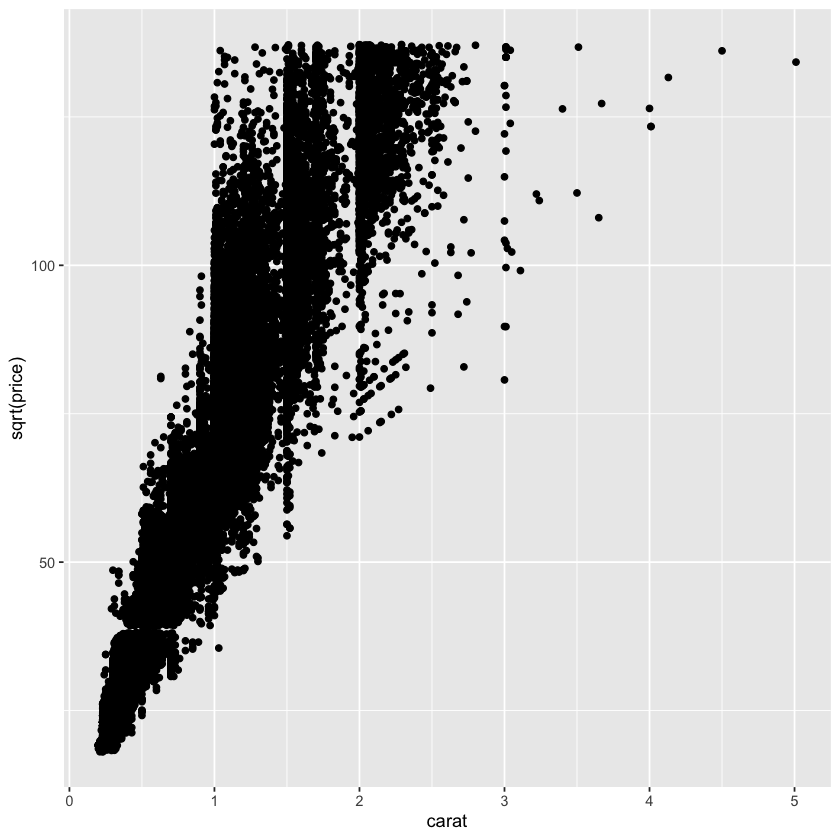

In [64]:
p2

### Modifications

![images](images/slides13.png)

### Axis labels with mathematical expressions

In [65]:
p1 <- ggplot(diamonds, aes(x=carat,y=price)) + geom_point() + scale_y_sqrt()
p2 <- p1 + labs(x = 'carat', y=expression(sqrt(price)))

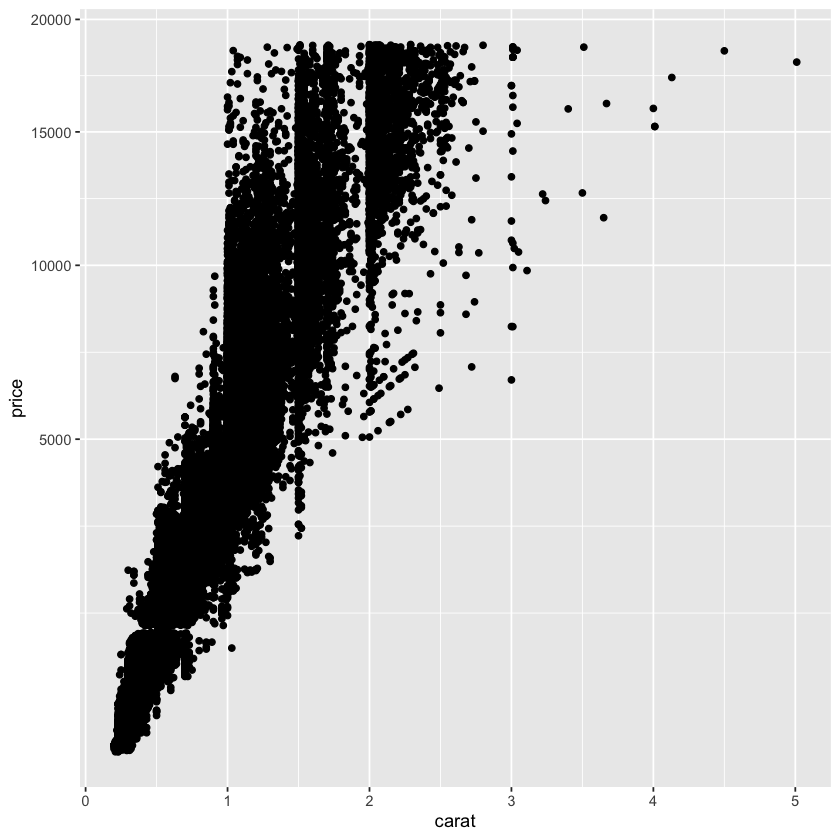

In [66]:
p1

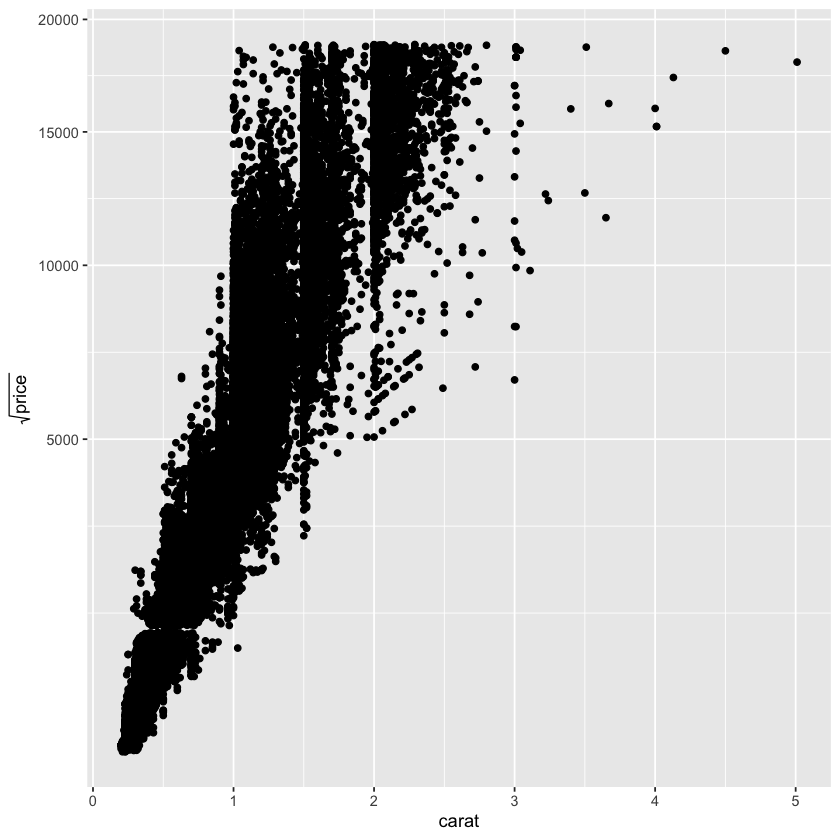

In [67]:
p2

![images](images/slides16.png)

In [7]:
library(IRdisplay)

  display_html("<iframe width='560' height='315' src='https://www.youtube.com/embed/N5gYo43oLE8?rel=0&amp;controls=0&amp;showinfo=0'</iframe>")


## [ggplot Cheatsheet](https://rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)

- - -

## Hands-On Exercises

![images](images/handson1.png)

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



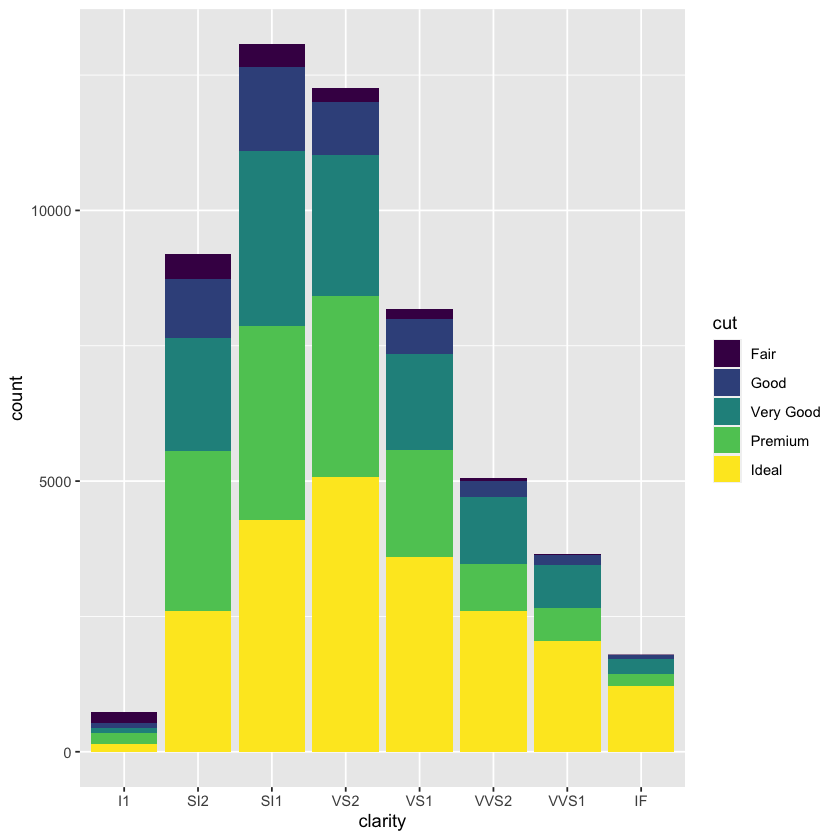

In [7]:
# hands on exercise 1
ggplot(diamonds, aes(x=clarity)) + geom_bar(aes(fill=cut))

![images](images/handson2.png)

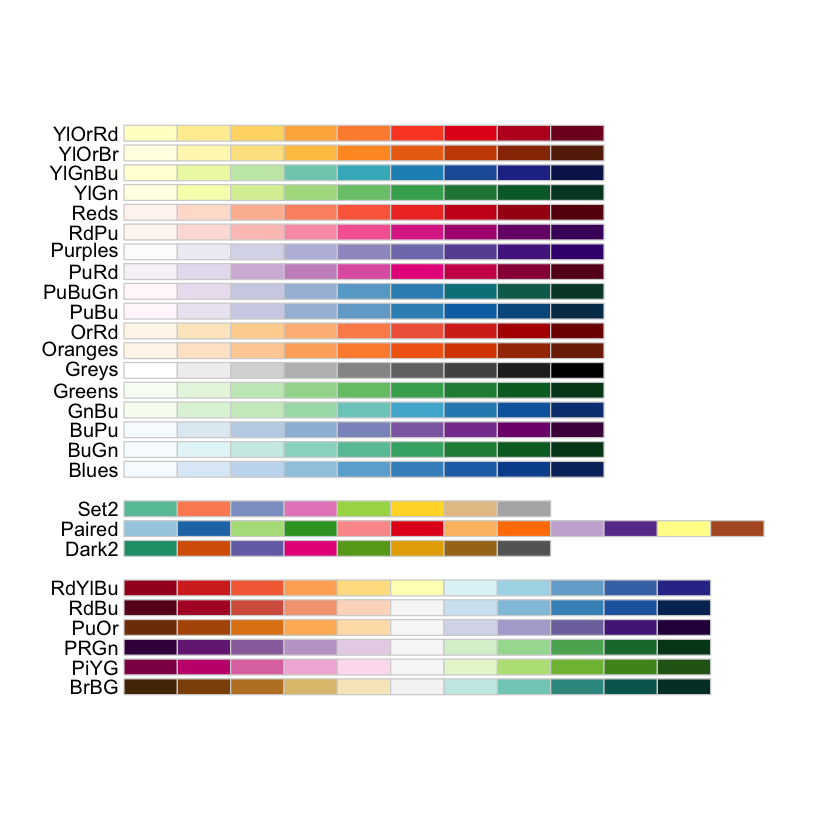

In [4]:
library(RColorBrewer)
display.brewer.all(colorblindFriendly = TRUE)

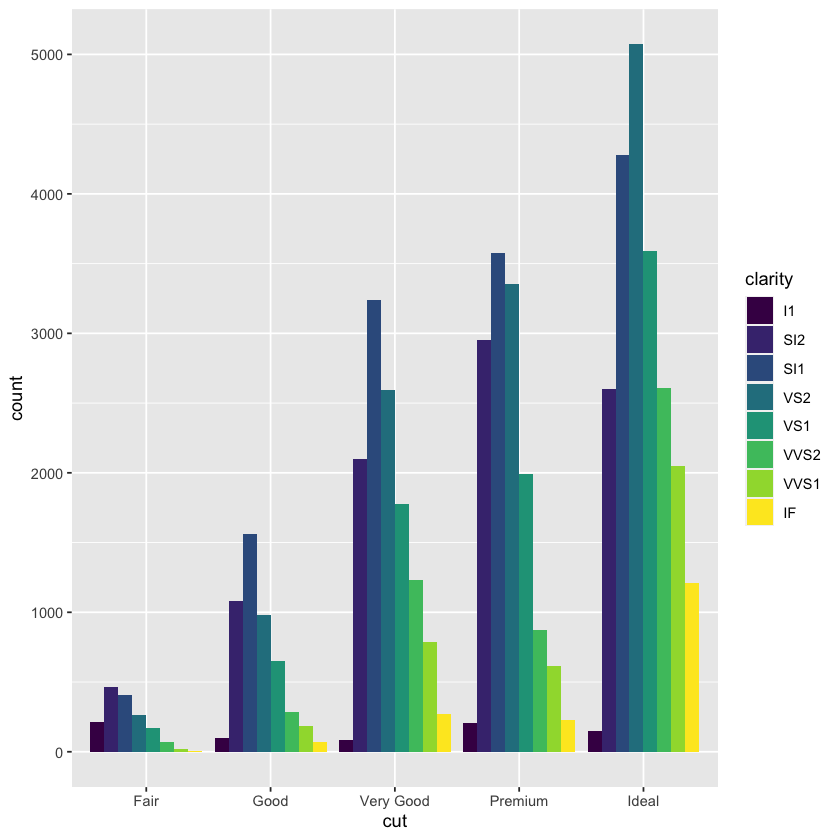

In [3]:
# hands on exercise 2

ggplot(diamonds, aes(cut, fill = clarity)) + 
  geom_bar(position = "dodge")

![images](images/handson3.png)

In [4]:
# hands on exercise 3

p1 <- ggplot(diamonds, aes(x=carat,y=price,color=price))+geom_point()
p2 <- p1 + scale_colour_gradient(low="blue", high="red")

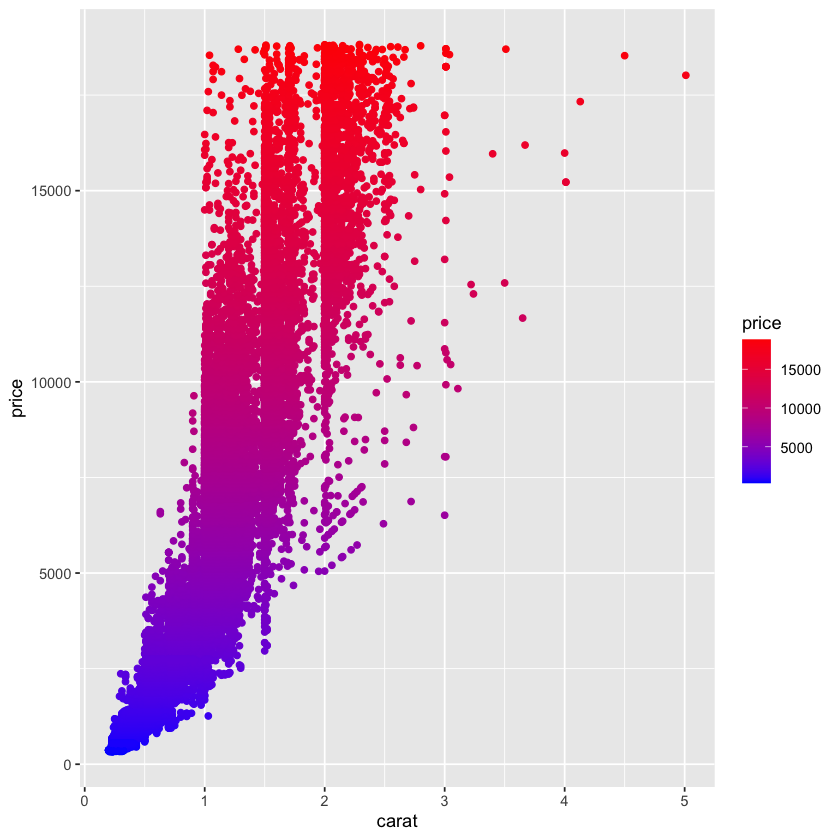

In [5]:
p2

![images](images/handson4.png)

In [20]:
?mpg

In [12]:
# hands on exercise 4
summary(mpg)

manufacturer model      displ year cyl trans      drv cty hwy fl class  
1  audi         a4         1.8   1999 4   auto(l5)   f   18  29  p  compact
2  audi         a4         1.8   1999 4   manual(m5) f   21  29  p  compact
3  audi         a4         2.0   2008 4   manual(m6) f   20  31  p  compact
4  audi         a4         2.0   2008 4   auto(av)   f   21  30  p  compact
5  audi         a4         2.8   1999 6   auto(l5)   f   16  26  p  compact
6  audi         a4         2.8   1999 6   manual(m5) f   18  26  p  compact
7  audi         a4         3.1   2008 6   auto(av)   f   18  27  p  compact
8  audi         a4 quattro 1.8   1999 4   manual(m5) 4   18  26  p  compact
9  audi         a4 quattro 1.8   1999 4   auto(l5)   4   16  25  p  compact
10 audi         a4 quattro 2.0   2008 4   manual(m6) 4   20  28  p  compact

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

In [14]:
fileUrl <- "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
auto <- read.table(fileUrl)
names(auto) <- c("mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name")

In [19]:
head(auto, n=10)

mpg cylinders displacement horsepower weight acceleration model year origin
1  18  8         307          130.0      3504   12.0         70         1     
2  15  8         350          165.0      3693   11.5         70         1     
3  18  8         318          150.0      3436   11.0         70         1     
4  16  8         304          150.0      3433   12.0         70         1     
5  17  8         302          140.0      3449   10.5         70         1     
6  15  8         429          198.0      4341   10.0         70         1     
7  14  8         454          220.0      4354    9.0         70         1     
8  14  8         440          215.0      4312    8.5         70         1     
9  14  8         455          225.0      4425   10.0         70         1     
10 15  8         390          190.0      3850    8.5         70         1     
   car name                 
1  chevrolet chevelle malibu
2  buick skylark 320        
3  plymouth satellite       
4  amc rebel sst            
5  ford torino              
6  ford galaxie 500         
7  chevrolet impala         
8  plymouth fury iii        
9  pontiac catalina         
10 amc ambassador dpl

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



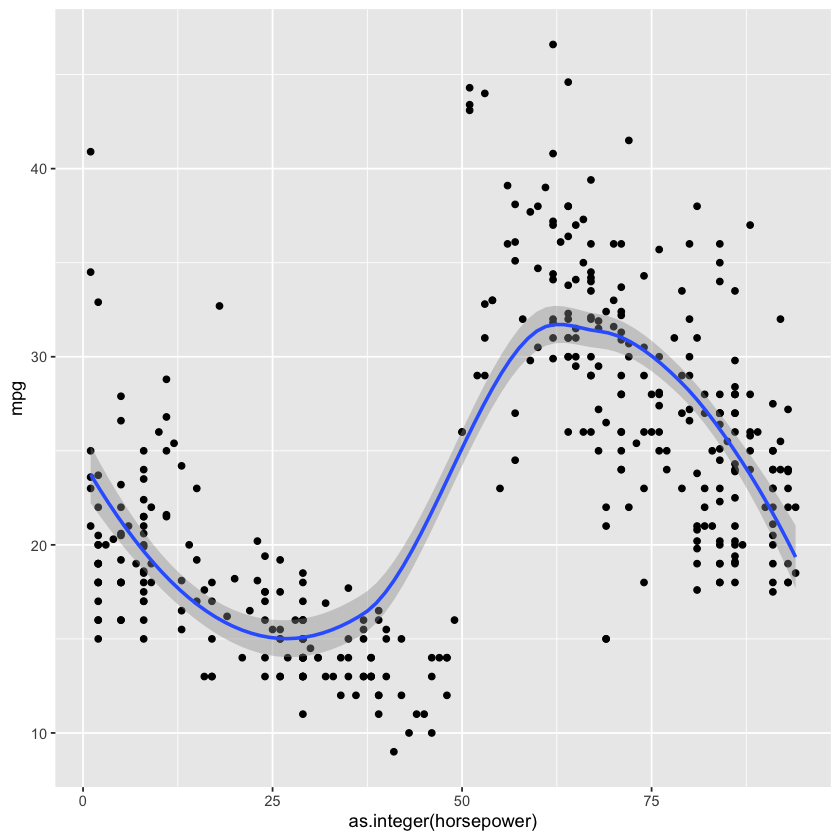

In [17]:
ggplot(auto, aes(as.integer(horsepower), mpg)) + geom_point()+geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



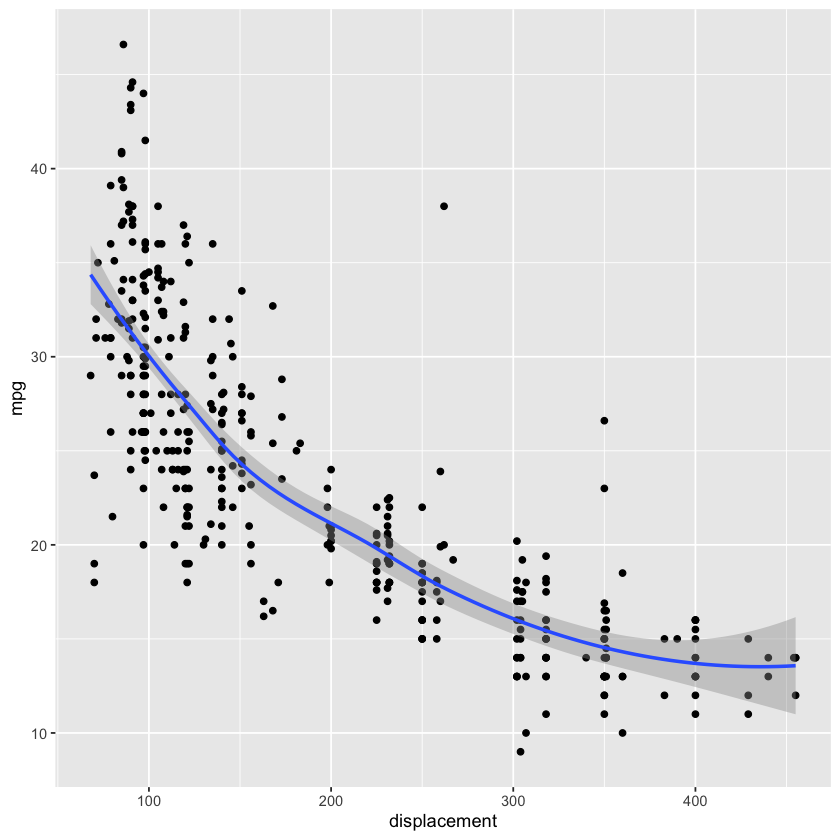

In [18]:
ggplot(auto, aes(displacement, mpg)) + geom_point()+geom_smooth()

![images](images/handson5.png)

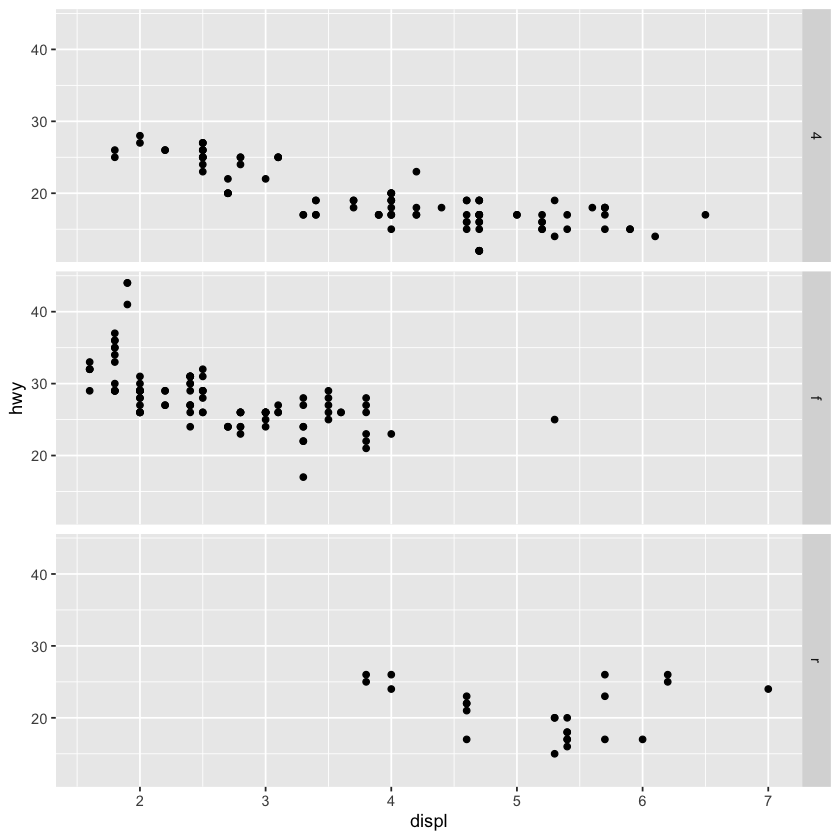

In [5]:
# hands on exercise 5

ggplot(data=mpg) + geom_point(mapping = aes(x= displ, y=hwy)) + facet_grid(drv ~ .)

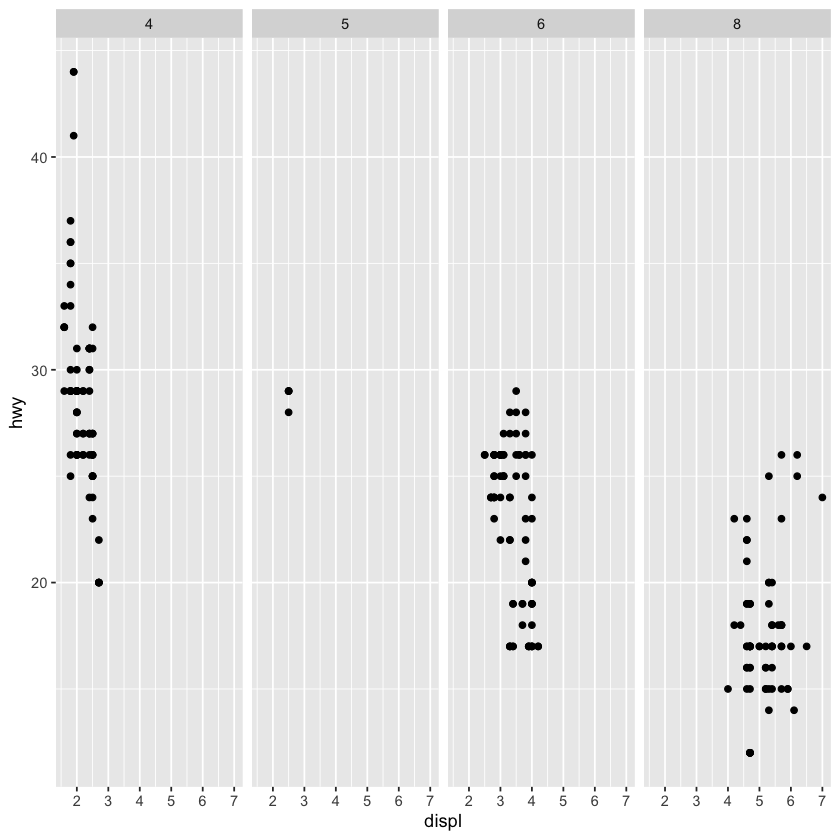

In [6]:
ggplot(data=mpg) + geom_point(mapping = aes(x= displ, y=hwy)) + facet_grid(. ~ cyl)